In [1]:
#dependencies
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
path='D:/Data Science/Machine Learning/../Simple Linear Regression/'
df=pd.read_csv(path+'Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
x=df.iloc[:,0].values #independent variable
y=df.iloc[:,1].values #dependent variable

In [5]:
x,y=torch.from_numpy(x),torch.from_numpy(y)

In [6]:
print(x)

tensor([ 1.1000,  1.3000,  1.5000,  2.0000,  2.2000,  2.9000,  3.0000,  3.2000,
         3.2000,  3.7000,  3.9000,  4.0000,  4.0000,  4.1000,  4.5000,  4.9000,
         5.1000,  5.3000,  5.9000,  6.0000,  6.8000,  7.1000,  7.9000,  8.2000,
         8.7000,  9.0000,  9.5000,  9.6000, 10.3000, 10.5000],
       dtype=torch.float64)


In [7]:
print(y)

tensor([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,  54445.,
         64445.,  57189.,  63218.,  55794.,  56957.,  57081.,  61111.,  67938.,
         66029.,  83088.,  81363.,  93940.,  91738.,  98273., 101302., 113812.,
        109431., 105582., 116969., 112635., 122391., 121872.],
       dtype=torch.float64)


In [8]:
#total samples
torch.numel(x) #to find the total number of elements

30

In [9]:
train_size=0.8*30#20 percent of the data=24

In [10]:
x_train,y_train,x_test,y_test=x[:24],y[:24],x[24:],y[24:]

In [11]:
#printing the shape of each
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

torch.Size([24])
torch.Size([24])
torch.Size([6])
torch.Size([6])


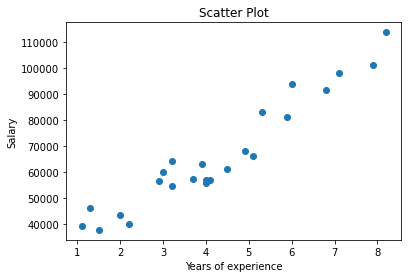

In [12]:
plt.scatter(x_train,y_train)
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("Scatter Plot")
plt.show()

In [13]:
#y=mx+c
#here c is the bias that we will have 
#m is the weight or slope
#x,y independent and dependent varaible resp.

In [14]:
m,c=torch.randn(24,requires_grad=True),torch.randn(24,requires_grad=True)
print(m)
print(c)

tensor([-1.7956, -0.7925,  0.6095,  0.9808, -0.7675,  0.9437,  0.5104, -1.0822,
        -1.1153,  0.3345, -0.6838, -0.1796,  0.5634,  1.5852,  0.5393,  2.1221,
        -0.3791,  0.5032,  0.0503,  0.2102,  0.4681,  0.9852,  0.2157, -0.2242],
       requires_grad=True)
tensor([-0.3802, -0.4772, -1.8648,  0.7988,  0.6515, -0.1082,  0.4254, -1.3710,
         1.0660,  0.2313, -0.0938,  1.1048,  1.1984,  0.1451,  1.2081, -0.4105,
        -0.6596,  1.1369, -0.5593, -0.8261,  0.3420, -1.4750, -1.0511, -1.7709],
       requires_grad=True)


In [15]:
def model(x):
    x=x.double()
    return x*m.t()+c

In [16]:
predictions=model(x_train) #it is just to show how it will predict

In [17]:
predictions #so here we see the predictions are way to vague

tensor([-2.3554, -1.5074, -0.9505,  2.7605, -1.0371,  2.6285,  1.9565, -4.8340,
        -2.5030,  1.4690, -2.7606,  0.3863,  3.4519,  6.6443,  3.6351,  9.9876,
        -2.5929,  3.8039, -0.2623,  0.4351,  3.5252,  5.5197,  0.6532, -3.6093],
       dtype=torch.float64, grad_fn=<AddBackward0>)

In [18]:
y_train #here just to give an idea how vastly the values are varying

tensor([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,  54445.,
         64445.,  57189.,  63218.,  55794.,  56957.,  57081.,  61111.,  67938.,
         66029.,  83088.,  81363.,  93940.,  91738.,  98273., 101302., 113812.],
       dtype=torch.float64)

In [19]:
#now we we will compare how the predictions are as compared to our target variables
def mse(t1,t2):
    diff=t1-t2
    return torch.sum(diff**2/diff.numel())

In [20]:
#here diff can be understood as targets-predicted values

In [21]:
mse(y_train,predictions) #so the number here is gigantic af! 
#need not worry will bring it down

tensor(4.8234e+09, dtype=torch.float64, grad_fn=<SumBackward0>)

In [22]:
loss=mse(y_train,predictions)
loss.backward()

In [23]:
#checking grads
m.grad

tensor([ -3606.6575,  -5005.7051,  -4716.4937,  -7253.7065,  -7313.5400,
        -13687.8477, -15037.0107, -14519.9561, -17186.0000, -17632.8223,
        -20546.7480, -18597.8711, -18984.5156, -19500.4043, -22915.2617,
        -27737.2715, -28063.4277, -36695.5195, -40003.6055, -46969.7812,
        -51982.8672, -58141.5938, -66690.0547, -77774.0000])

In [24]:
c.grad

tensor([-3278.7795, -3850.5422, -3144.3291, -3626.8533, -3324.3364, -4719.9478,
        -5012.3369, -4537.4863, -5370.6255, -4765.6274, -5268.3965, -4649.4678,
        -4746.1289, -4756.1963, -5092.2803, -5660.6675, -5502.6328, -6923.6831,
        -6780.2720, -7828.2969, -7644.5396, -8188.9565, -8441.7793, -9484.6338])

In [25]:
#initialising the grads to zero 
m.grad.zero_()
c.grad.zero_()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
#this is how you adjust weights
with torch.no_grad(): #with this in play torch will not track or modify the grad of tensors
    m-=m.grad*1e-5
    c-=c.grad*1e-5
    m.grad.zero_()
    c.grad.zero_()

In [27]:
#now training the data for multiple epochs
for i in range(100):
    pred=model(x_train)
    loss=mse(y_train,pred)
    loss.backward()
    with torch.no_grad():
        m-=m.grad*1e-3
        c-=c.grad*1e-3
        m.grad.zero_()
        c.grad.zero_()

In [28]:
#to verify the loss
preds=model(x_train)
loss=mse(y_train,preds)
print(loss)

tensor(2.8871e+09, dtype=torch.float64, grad_fn=<SumBackward0>)
